In [4]:
# Import the dependencies.
import os  ## needed to change dir to import keys from different folder
import requests  ## needed for web crawls 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import time

In [ ]:
###  Get the Weather API key.
###  I developed this as a way around the keeping the APU keys in same folder.
 ##  Works fine but there is a better way. Don't use, but good practice.
# Change 
os.chdir('c:\\Users\\Marishka\\Documents\DABootcamp\\APIs\Keys') 

## Import the OpenWeatherMap API key
from config import weather_api_key

# Change back to current folder
os.chdir('c:\\Users\\Marishka\\Documents\DABootcamp\\W7-WeatherPyWithPythonAPIs\\World_Weather_Analysis') 

# Get current path using getcwd() 
cwd = os.getcwd() 
print("Current working directory is:", cwd)

In [ ]:
###  Alternative way to get the weather data api key
 ##  Use key in project folder, but add to GitHub ignore

 ## Import the OpenWeatherMap API key
from config import weather_api_key

# Get current path using getcwd() 
cwd = os.getcwd() 
print("Current working directory is:", cwd)

In [5]:
# Create a set of random latitude and longitude combinations.
# chain np and random 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs) ## packs both variables into a tupled zip file
lat_lngs # show me the zip file

In [ ]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs) #write the zip file into a list, so you can work with it

In [ ]:
## 6.1.5: Generate Random World Cities
## Review and read citipy:  https://github.com/wingchen/citipy
 # Nice simple read me. thank you wing chen    

In [7]:
# Create a list for holding the cities.
cities = []  ## empty list
# Identify the nearest city for each latitude and longitude combination.
## The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.
for coordinate in coordinates:  # loop thru coordinates
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [9]:
## we have 608 cities for our data set. is that enough?

In [1]:
### 6.2.3 Make an API Call

Current working directory is: c:\Users\Marishka\Documents\DABootcamp\W7-WeatherPyWithPythonAPIs\World_Weather_Analysis


In [9]:
## 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=058ccb02f765c0268667a6f8eeac8cb8


In [10]:
### 6.2.6  Get the City Weather Data
# We will need to do the following:

# Import our dependencies and initialize counters and an empty list that will hold the weather data.
   
# Loop through the cities list.
# Group the cities in sets of 50 to log the process as we find the weather data for each city.
# Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# Build the city_url or endpoint for each city.
# Log the URL and the record and set numbers.
# Make an API request for each city.
# Parse the JSON weather data for the following:
# City, country, and date
# Latitude and longitude
# Maximum temperature
# Humidity
# Cloudiness
# Wind speed
# Add the data to a list in a dictionary format and then convert the list to a DataFrame

In [11]:
# start with an empty list for weather data
city_data=[]  # empty list

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1  # number of records in crawl
set_count = 1  # # of sets in crawl.  50 cites per set.

Beginning Data Retrieval     
-----------------------------


In [12]:
## Now the loop logic 
# for i in range(len(cities)): # creates a loop. range is length of cities variable.

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + "i"

In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities): # for loop with enumerate. reference index and city var

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50): ## if index divisble by 50 and index> 50, creates a new group
        set_count += 1  # adds one to set count 
        record_count = 1 # resets record count to 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass  ## general purpose statement to handle all errors and continue

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | dikson
Processing Record 2 of Set 13 | araouane
Processing Record 3 of Set 13 | balclutha
Processing Record 4 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 13 | vao
Processing Record 6 of Set 13 | rikitea
Processing Record 7 of Set 13 | barrow
Processing Record 8 of Set 13 | ushuaia
Processing Record 9 of Set 13 | atuona
Processing Record 10 of Set 13 | souillac
Processing Record 11 of Set 13 | busselton
Processing Record 12 of Set 13 | cap-aux-meules
Processing Record 13 of Set 13 | havoysund
Processing Record 14 of Set 13 | new norfolk
Processing Record 15 of Set 13 | salalah
Processing Record 16 of Set 13 | fukue
Processing Record 17 of Set 13 | mataura
Processing Record 18 of Set 13 | half moon bay
Processing Record 19 of Set 13 | punta arenas
Processing Record 20 of Set 13 | lorengau
Processing Record 21 of Set 13 | omboue
Processing Record 22 of Set 13 | bluff
Processing Record 23 of Set 13 | buala
Processing Record 2

Processing Record 34 of Set 16 | yar-sale
Processing Record 35 of Set 16 | burkburnett
Processing Record 36 of Set 16 | port hardy
Processing Record 37 of Set 16 | tiksi
Processing Record 38 of Set 16 | atbasar
Processing Record 39 of Set 16 | sinjar
Processing Record 40 of Set 16 | nukus
Processing Record 41 of Set 16 | honiara
Processing Record 42 of Set 16 | sibay
Processing Record 43 of Set 16 | bubaque
Processing Record 44 of Set 16 | nizhneyansk
City not found. Skipping...
Processing Record 45 of Set 16 | nioro
Processing Record 46 of Set 16 | cheney
Processing Record 47 of Set 16 | sosnovo-ozerskoye
Processing Record 48 of Set 16 | uthal
Processing Record 49 of Set 16 | dakar
Processing Record 50 of Set 16 | flinders
Processing Record 1 of Set 17 | katangli
Processing Record 2 of Set 17 | atambua
Processing Record 3 of Set 17 | kupang
Processing Record 4 of Set 17 | jinchang
Processing Record 5 of Set 17 | narsaq
Processing Record 6 of Set 17 | san quintin
Processing Record 7 of

Processing Record 15 of Set 20 | parrita
Processing Record 16 of Set 20 | domoni
City not found. Skipping...
Processing Record 17 of Set 20 | camacha
Processing Record 18 of Set 20 | abu samrah
Processing Record 19 of Set 20 | campos
Processing Record 20 of Set 20 | korcula
Processing Record 21 of Set 20 | moville
Processing Record 22 of Set 20 | dongsheng
Processing Record 23 of Set 20 | wronki
Processing Record 24 of Set 20 | tigil
Processing Record 25 of Set 20 | ryotsu
Processing Record 26 of Set 20 | general pico
Processing Record 27 of Set 20 | saint-augustin
Processing Record 28 of Set 20 | ino
Processing Record 29 of Set 20 | annau
Processing Record 30 of Set 20 | great yarmouth
Processing Record 31 of Set 20 | vardo
Processing Record 32 of Set 20 | buckeye
Processing Record 33 of Set 20 | huamachuco
Processing Record 34 of Set 20 | pitimbu
Processing Record 35 of Set 20 | denia
Processing Record 36 of Set 20 | soe
Processing Record 37 of Set 20 | mana
Processing Record 38 of S

City not found. Skipping...
Processing Record 46 of Set 23 | ngukurr
City not found. Skipping...
Processing Record 47 of Set 23 | nabire
Processing Record 48 of Set 23 | tungkang
City not found. Skipping...
Processing Record 49 of Set 23 | boa esperanca
Processing Record 50 of Set 23 | berlevag
Processing Record 1 of Set 24 | kalanwali
Processing Record 2 of Set 24 | laguna
Processing Record 3 of Set 24 | assai
City not found. Skipping...
Processing Record 4 of Set 24 | kabugao
Processing Record 5 of Set 24 | lagoa
Processing Record 6 of Set 24 | bad durkheim
Processing Record 7 of Set 24 | luganville
Processing Record 8 of Set 24 | xinqing
Processing Record 9 of Set 24 | fuzhou
Processing Record 10 of Set 24 | lavumisa
Processing Record 11 of Set 24 | santa isabel do rio negro
Processing Record 12 of Set 24 | grandview
Processing Record 13 of Set 24 | nizhniy odes
Processing Record 14 of Set 24 | sarnen
Processing Record 15 of Set 24 | eyl
Processing Record 16 of Set 24 | lima
Process

In [24]:
#what do we get back?
len(city_data)  ## We have 535 useful records.  We needed at least 500.

535

In [25]:
### 6.2.7  Create a DataFrame of the City Weather Data

In [36]:
## df=pd.DataFrame (list with dictionaires.)
city_data_df=pd.DataFrame(city_data)
city_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.51,80.55,4.06,95,95,10.25,RU,2020-01-07 20:45:24
1,Araouane,18.90,-3.53,62.82,14,100,7.78,ML,2020-01-07 20:45:24
2,Balclutha,-46.24,169.74,55.00,66,95,8.99,NZ,2020-01-07 20:45:25
3,Vao,59.10,26.19,38.34,82,100,13.85,EE,2020-01-07 20:45:25
4,Rikitea,-23.12,-134.97,77.29,79,0,18.25,PF,2020-01-07 20:45:25


In [53]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 9 columns):
City          535 non-null object
Country       535 non-null object
Date          535 non-null object
Lat           535 non-null float64
Lng           535 non-null float64
Max Temp      535 non-null float64
Humidity      535 non-null int64
Cloudiness    535 non-null int64
Wind Speed    535 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 37.7+ KB


In [38]:
## Now practice reordering columns for ease of readability
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2020-01-07 20:45:24,73.51,80.55,4.06,95,95,10.25
1,Araouane,ML,2020-01-07 20:45:24,18.90,-3.53,62.82,14,100,7.78
2,Balclutha,NZ,2020-01-07 20:45:25,-46.24,169.74,55.00,66,95,8.99
3,Vao,EE,2020-01-07 20:45:25,59.10,26.19,38.34,82,100,13.85
4,Rikitea,PF,2020-01-07 20:45:25,-23.12,-134.97,77.29,79,0,18.25


In [39]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2020-01-07 20:45:24,73.51,80.55,4.06,95,95,10.25
1,Araouane,ML,2020-01-07 20:45:24,18.90,-3.53,62.82,14,100,7.78
2,Balclutha,NZ,2020-01-07 20:45:25,-46.24,169.74,55.00,66,95,8.99
3,Vao,EE,2020-01-07 20:45:25,59.10,26.19,38.34,82,100,13.85
4,Rikitea,PF,2020-01-07 20:45:25,-23.12,-134.97,77.29,79,0,18.25


In [40]:
## Output the content to a CSV file so we have static data to work with...
#  Create weather_data folder (Windows)
#  Create output file (CSV)
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [44]:
# Get today's date in seconds.
import time
#today = time.time()
today = time.strftime("%x")
today

'01/08/20'

In [41]:
### 6.3.1  Plot Latitude vs Temperature

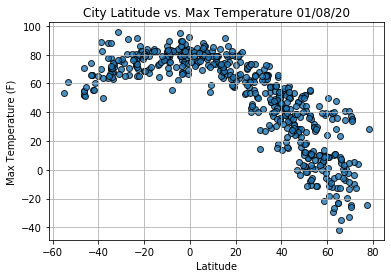

In [55]:
# Scatter plot for latitude vs. max temperature. 6.3.2
plt.scatter(lats,  # sets x_axis
            max_temps,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",  # describes line
            alpha=0.8, label="Cities") # more description

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

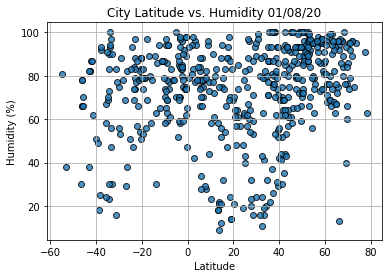

In [50]:
# Scatter plot for latitude vs. Humidity. 6.3.2
plt.scatter(lats,  # sets x_axis
            humidity,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",  # describes line
            alpha=0.8, label="Cities") # more description

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

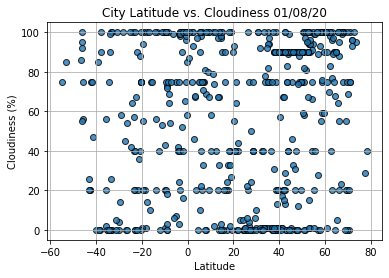

In [51]:
# Scatter plot for latitude vs. Cloudiness. 6.3.3
plt.scatter(lats,  # sets x_axis
            cloudiness,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",  # describes line
            alpha=0.8, label="Cities") # more description

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

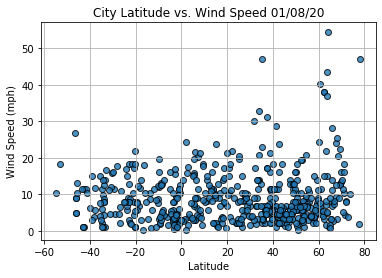

In [52]:
# Scatter plot for latitude vs. Wind Speed. 6.3.4
plt.scatter(lats,  # sets x_axis
            wind_speed,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",  # describes line
            alpha=0.8, label="Cities") # more description

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()